In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen
from mplsoccer import Pitch, add_image

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=1):
    return OffsetImage(path, zoom=zoom)

In [4]:
from TresSeisCincoScores import TresSeisCincoScores

In [5]:
scraper = TresSeisCincoScores()
df = scraper.scrapear_estadisticas_liga(111)

In [22]:
df.estadistica.value_counts()

estadistica
Goles                  20
Asistencias            20
Puntajes 365           20
Barridas ganadas       20
Tarjetas Rojas         20
Tarjetas Amarillas     20
Penales convertidos    18
Valla invicta          12
Penales atajados       11
Goles esperados         2
Name: count, dtype: int64

In [23]:
df[df['estadistica'] == 'Goles']

,id,name,positionName,value,estadistica
0,45058,Maximilian Entrup,Centro Delantero,9,Goles
1,89102,Sinan Karweina,Delantero Derecho,9,Goles
2,43075,Robert Zulj,Mediocampista Ofensivo,9,Goles
3,56997,Andreas Gruber,Delantero Derecho,8,Goles
4,106134,Karim Konaté,Centro Delantero,8,Goles
5,102425,Thierno Ballo,Mediocampista Ofensivo,7,Goles
6,81257,Marco Grüll,Delantero Izquierdo,6,Goles
7,135763,Ronivaldo,Centro Delantero,6,Goles
8,136633,Mohamed Bamba,Centro Delantero,6,Goles
9,3990,Guido Burgstaller,Centro Delantero,5,Goles


In [6]:
response = requests.get('https://webws.365scores.com/web/stats/?appTypeId=5&langId=29&timezoneName=America/Buenos_Aires&userCountryId=382&competitions=620&competitors=&withSeasons=true')

In [7]:
estadisticas = response.json()

In [8]:
estadisticas.keys()

dict_keys(['stats', 'sports', 'countries', 'competitions', 'competitors'])

In [9]:
estadisticas_generales = estadisticas['stats']

In [10]:
goles = estadisticas_generales[0]

In [11]:
goles['name']

'Goles'

In [12]:
df_goles = pd.DataFrame(goles['rows'])
df_goles_1 = df_goles['entity'].apply(pd.Series)
df_goles_2 = df_goles['stats'].apply(pd.Series)[0].apply(pd.Series)
stats_goles = pd.concat([df_goles_1, df_goles_2], axis=1)[['id', 'name', 'positionName', 'value']]

In [13]:
stats_goles['estadistica'] = 'goles'

In [14]:
def parsear_dataframe(objeto):
    df = pd.DataFrame(objeto['rows'])
    df_1 = df['entity'].apply(pd.Series)
    df_2 = df['stats'].apply(pd.Series)[0].apply(pd.Series)
    df_concat = pd.concat([df_1, df_2], axis=1)[['id', 'name', 'positionName', 'value']]
    df_concat['estadistica'] = objeto['name']
    return df_concat

In [15]:
df_total = pd.DataFrame()
for i in range(len(estadisticas_generales)):
    objeto = estadisticas_generales[i]
    stats_df = parsear_dataframe(objeto)
    df_total = pd.concat([df_total, stats_df])

In [16]:
df_total.estadistica.value_counts()

estadistica
Goles                    20
Goles esperados          20
Asistencias              20
Asistencias esperadas    20
Puntajes 365             20
Barridas ganadas         20
Tarjetas Rojas           20
Tarjetas Amarillas       20
Penales convertidos      16
Penales atajados          5
Valla invicta             4
Name: count, dtype: int64

In [17]:
def scrapear_estadisticas_liga(league_id):
    response = requests.get(f'https://webws.365scores.com/web/stats/?appTypeId=5&langId=29&timezoneName=America/Buenos_Aires&userCountryId=382&competitions={league_id}&competitors=&withSeasons=true')
    estadisticas = response.json()
    estadisticas_generales = estadisticas['stats']
    df_total = pd.DataFrame()
    for i in range(len(estadisticas_generales)):
        objeto = estadisticas_generales[i]
        stats_df = parsear_dataframe(objeto)
        df_total = pd.concat([df_total, stats_df])
    return df_total

In [18]:
df = scrapear_estadisticas_liga(572)

In [19]:
id_ligas = {
    'Brasileirao': 113,
    'Champions League': 572
}

In [20]:
df = scrapear_estadisticas_liga(id_ligas['Brasileirao'])

In [ ]:
df_total.estadistica.value_counts()

estadistica
Goles                    20
Goles esperados          20
Asistencias              20
Asistencias esperadas    20
Puntajes 365             20
Penales convertidos      20
Barridas ganadas         20
Tarjetas Rojas           20
Tarjetas Amarillas       20
Valla invicta            20
Penales atajados         11
Name: count, dtype: int64

In [ ]:
goles = df_total[df_total['estadistica'] == 'Goles']
goles_esperados = df_total[df_total['estadistica'] == 'Goles esperados']

In [ ]:
goles_esperados['value'] = goles_esperados['value'].astype(float)

<ipython-input-98-244ea79eb481>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goles_esperados['value'] = goles_esperados['value'].astype(float)


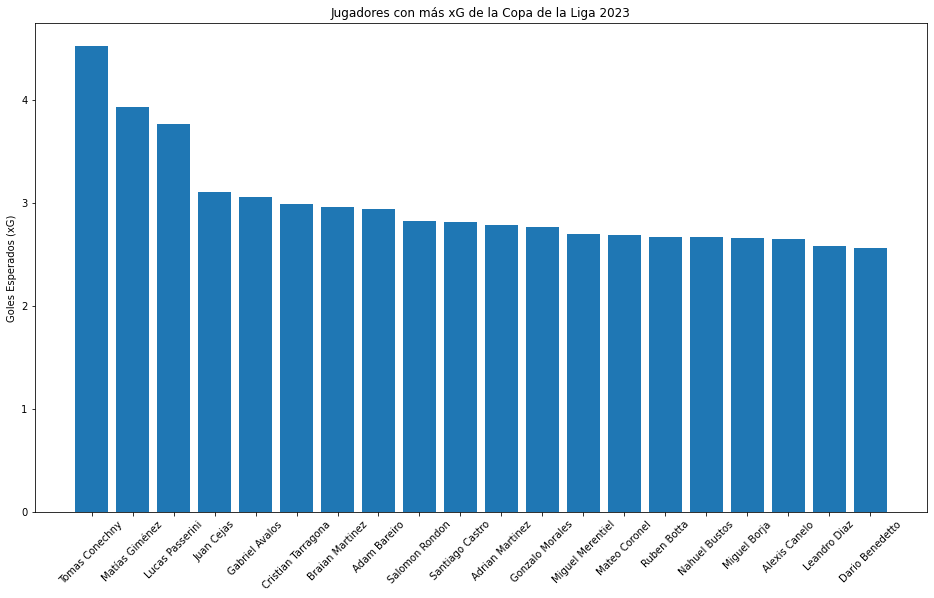

In [ ]:
fig, ax= plt.subplots(figsize=(16,9))
fig.set_facecolor('white')

ax.bar(goles_esperados.name, goles_esperados.value)
ax.set_title('Jugadores con más xG de la Copa de la Liga 2023')
ax.set_ylabel('Goles Esperados (xG)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
response = requests.get('https://webws.365scores.com/web/game/?appTypeId=5&langId=29&timezoneName=America/Buenos_Aires&userCountryId=382&gameId=3994284&matchupId=8637-8645-620&topBookmaker=14')

In [12]:
partido = scraper.sacar_data_partido('4032727', '865-883-7214')

In [13]:
partido

{'id': 4032727,
 'sportId': 1,
 'competitionId': 7214,
 'seasonNum': 7,
 'stageNum': 1,
 'groupNum': 2,
 'roundNum': 6,
 'roundName': 'Fecha',
 'competitionDisplayName': 'Argentina, Copa de la Liga Profesional',
 'startTime': '2024-02-17T17:00:00-03:00',
 'statusGroup': 4,
 'statusText': 'Finalizado',
 'shortStatusText': 'Final.',
 'gameTimeAndStatusDisplayType': 1,
 'justEnded': False,
 'gameTime': 90.0,
 'gameTimeDisplay': '',
 'preciseGameTime': {'minutes': 90,
  'seconds': 0,
  'autoProgress': False,
  'clockDirection': 1},
 'hasLineups': True,
 'hasMissingPlayers': True,
 'hasFieldPositions': True,
 'homeCompetitor': {'id': 865,
  'countryId': 10,
  'sportId': 1,
  'name': 'San Lorenzo',
  'score': 2.0,
  'isQualified': False,
  'toQualify': False,
  'isWinner': True,
  'type': 1,
  'recentMatches': [4032727,
   4032710,
   4032697,
   4032228,
   4032209,
   4032198,
   4039215,
   4039207,
   3877505,
   3974786,
   3877486,
   3877478,
   3877464,
   3877450,
   3877430],
  'li

In [15]:
pd.DataFrame(partido['members'])

,competitorId,id,athleteId,name,shortName,jerseyNumber,nameForURL,imageVersion
0,865,664705,38676,Facundo Altamirano,Altamirano,1,facundo-altamirano,6
1,865,47526181,73853,Jhohan Romaña,Romaña,4,jhohan-romana,10
2,865,59135722,98940,Gonzalo Luján,Luján,35,gonzalo-lujan,7
3,865,53598767,85143,Gastón Hernández,Hernández,23,gaston-hernandez,11
4,865,65512282,110696,Agustín Giay,Giay,8,agustin-giay,8
5,865,64385048,108174,Francisco Perruzzi,Perruzzi,50,francisco-perruzzi,6
6,865,66044704,115033,Elián Irala,Irala,17,elian-irala,6
7,865,3474171,53765,Malcom Braida,Braida,21,malcom-braida,9
8,865,3332373,48442,Nahuel Barrios,Barrios,10,nahuel-barrios,9
9,865,628440,51856,Adam Bareiro,Bareiro,11,adam-bareiro,13


In [23]:
heatmap = scraper.sacar_mapa_calor('Jhohan Romaña', '4032727', '865-883-7214')

Text(0.5, 1.0, 'Mapa Calor Jhohan Romaña')

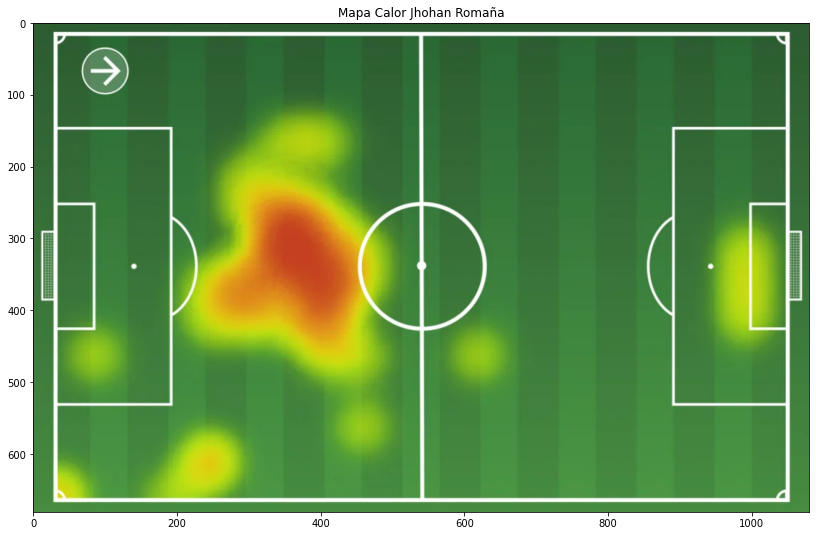

In [30]:
fig, ax = plt.subplots(figsize=(16,9))
fig.set_facecolor('white')
ax.imshow(heatmap)
plt.title('Mapa Calor Jhohan Romaña')
plt.savefig('mapa_calor.png')

In [18]:
tiros = scraper.sacar_tiros(partido)
pd.concat([tiros, tiros.outcome.apply(pd.Series)], axis=1)

,xg,xgot,bodyPart,key,competitorNum,time,status,playerId,line,side,type,subType,gameId,outcome,goalDescription,y,z,id,name,x
0,0.02,-,Pie izquierdo,14032727,1,4',6,66044704,30.7,75.4,0,4,4032727,"{'y': 52.9, 'z': 90.3, 'id': 1, 'name': 'Falla...",NaN,52.9,90.3,1,Fallado,NaN
1,0.02,0.22,Pie derecho,24032727,1,5',6,65512282,25.3,86.8,0,4,4032727,"{'y': 46.4, 'z': 26.6, 'id': 2, 'name': 'Ataja...",Arriba a la derecha,46.4,26.6,2,Atajado,NaN
2,0.01,-,Pie derecho,34032727,1,18',6,64325644,37.1,73.6,0,7,4032727,"{'y': 41.5, 'z': 12.5, 'id': 1, 'name': 'Falla...",Afuera a la derecha,41.5,12.5,1,Fallado,NaN
3,0.18,0.90,De cabeza,44032727,1,22',6,628440,52.1,94.2,0,7,4032727,"{'y': 53.7, 'z': 24.7, 'id': 0, 'name': 'Gol'}",Arriba a la izquierda,53.7,24.7,0,Gol,NaN
4,0.23,0.46,Pie izquierdo,54032727,2,35',6,914836,53.9,89.1,0,7,4032727,"{'y': 48.7, 'z': 1.9, 'id': 2, 'name': 'Atajado'}",Abajo al medio,48.7,1.9,2,Atajado,NaN
5,0.01,0.05,Pie derecho,64032727,1,38',6,628440,71.8,73.2,0,4,4032727,"{'y': 48.7, 'z': 18.4, 'id': 2, 'name': 'Ataja...",Abajo al medio,48.7,18.4,2,Atajado,NaN
6,0.04,-,Pie izquierdo,74032727,1,39',6,64325644,50.9,79.2,0,-1,4032727,"{'x': 81.9, 'y': 51.3, 'id': 4, 'name': 'Bloqu...",Abajo a la izquierda,51.3,NaN,4,Bloqueado,81.9
7,0.07,0.09,De cabeza,84032727,1,45 + 1',6,47526181,53.0,90.2,0,7,4032727,"{'y': 50.9, 'z': 30.4, 'id': 2, 'name': 'Ataja...",Arriba al medio,50.9,30.4,2,Atajado,NaN
8,0.04,-,Pie derecho,94032727,1,48',8,628440,29.8,95.6,0,4,4032727,"{'y': 49.1, 'z': 68.1, 'id': 1, 'name': 'Falla...",NaN,49.1,68.1,1,Fallado,NaN
9,0.02,0.05,Pie izquierdo,104032727,2,53',8,475065,39.2,67.5,0,4,4032727,"{'y': 48.3, 'z': 6.3, 'id': 2, 'name': 'Atajado'}",Abajo al medio,48.3,6.3,2,Atajado,NaN


In [12]:
pd.DataFrame(partido['chartEvents']['events'])

,xg,xgot,bodyPart,key,competitorNum,time,status,playerId,line,side,type,subType,gameId,outcome,goalDescription
0,0.02,-,Pie izquierdo,14032727,1,4',6,66044704,30.7,75.4,0,4,4032727,"{'y': 52.9, 'z': 90.3, 'id': 1, 'name': 'Falla...",NaN
1,0.02,0.22,Pie derecho,24032727,1,5',6,65512282,25.3,86.8,0,4,4032727,"{'y': 46.4, 'z': 26.6, 'id': 2, 'name': 'Ataja...",Arriba a la derecha
2,0.01,-,Pie derecho,34032727,1,18',6,64325644,37.1,73.6,0,7,4032727,"{'y': 41.5, 'z': 12.5, 'id': 1, 'name': 'Falla...",Afuera a la derecha
3,0.18,0.90,De cabeza,44032727,1,22',6,628440,52.1,94.2,0,7,4032727,"{'y': 53.7, 'z': 24.7, 'id': 0, 'name': 'Gol'}",Arriba a la izquierda
4,0.23,0.46,Pie izquierdo,54032727,2,35',6,914836,53.9,89.1,0,7,4032727,"{'y': 48.7, 'z': 1.9, 'id': 2, 'name': 'Atajado'}",Abajo al medio
5,0.01,0.05,Pie derecho,64032727,1,38',6,628440,71.8,73.2,0,4,4032727,"{'y': 48.7, 'z': 18.4, 'id': 2, 'name': 'Ataja...",Abajo al medio
6,0.04,-,Pie izquierdo,74032727,1,39',6,64325644,50.9,79.2,0,-1,4032727,"{'x': 81.9, 'y': 51.3, 'id': 4, 'name': 'Bloqu...",Abajo a la izquierda
7,0.07,0.09,De cabeza,84032727,1,45 + 1',6,47526181,53.0,90.2,0,7,4032727,"{'y': 50.9, 'z': 30.4, 'id': 2, 'name': 'Ataja...",Arriba al medio
8,0.04,-,Pie derecho,94032727,1,48',8,628440,29.8,95.6,0,4,4032727,"{'y': 49.1, 'z': 68.1, 'id': 1, 'name': 'Falla...",NaN
9,0.02,0.05,Pie izquierdo,104032727,2,53',8,475065,39.2,67.5,0,4,4032727,"{'y': 48.3, 'z': 6.3, 'id': 2, 'name': 'Atajado'}",Abajo al medio


In [20]:
scraper.sacar_estadisticas_partido_generales('4032727', '865-883-7214')

,name,categoryName,value,equipo
0,Posesión,Posesión,47%,San Lorenzo
1,Goles esperados,Ataque,0.89,San Lorenzo
2,Total Remates,Ataque,15,San Lorenzo
3,Remates a Puerta,Ataque,7,San Lorenzo
4,Goles esperados de remates al arco,Ataque,1.78,San Lorenzo
5,Remates Fuera,Ataque,6,San Lorenzo
6,Remates bloqueados,Ataque,2,San Lorenzo
7,Grandes chances,Ataque,1,San Lorenzo
8,Asistencias esperadas,Ataque,0.83,San Lorenzo
9,Saques de Esquina,Ataque,4,San Lorenzo


In [ ]:
response.json()['game']

{'id': 3994284,
 'sportId': 1,
 'competitionId': 620,
 'seasonNum': 124,
 'stageNum': 4,
 'groupNum': 2,
 'roundNum': 2,
 'roundName': 'Fecha',
 'competitionDisplayName': 'Colombia, Liga BetPlay',
 'startTime': '2023-11-19T18:00:00-03:00',
 'statusGroup': 4,
 'statusText': 'Finalizado',
 'shortStatusText': 'Final.',
 'gameTimeAndStatusDisplayType': 1,
 'justEnded': False,
 'gameTime': 90.0,
 'gameTimeDisplay': '',
 'preciseGameTime': {'minutes': 90,
  'seconds': 0,
  'autoProgress': False,
  'clockDirection': 1},
 'hasLineups': True,
 'hasMissingPlayers': True,
 'hasFieldPositions': True,
 'homeCompetitor': {'id': 8637,
  'countryId': 109,
  'sportId': 1,
  'name': 'Millonarios',
  'score': 2.0,
  'isQualified': False,
  'toQualify': False,
  'isWinner': True,
  'type': 1,
  'recentMatches': [3994284,
   3990536,
   3994281,
   3726046,
   3966327,
   3966339,
   3726006,
   3726031,
   3726026,
   3725992,
   3726014,
   3909522,
   3909518,
   3725987,
   3725970],
  'lineups': {'sta

In [ ]:
data_partido = response.json()['game']

In [ ]:
def nombres_equipos(data_partido):
    valores = ['home', 'away']
    nombres = []
    for valor in valores:
        nombre = data_partido[f'{valor}Competitor']['name']
        nombres.append(nombre)
    local, visitante = nombres[0], nombres[1]
    return local, visitante

In [ ]:
local, visitante = nombres_equipos(data_partido)

In [ ]:
estadisticas_partido = pd.DataFrame(response.json()['game']['homeCompetitor']['statistics'])[['name', 'categoryName', 'value']]
estadisticas_partido['equipo'] = local

In [ ]:
def sacar_estadisticas_partido_generales(data_partido):
    valores = ['home', 'away']
    df_total = pd.DataFrame()
    for valor in valores:
        df = pd.DataFrame(data_partido[f'{valor}Competitor']['statistics'])[['name', 'categoryName', 'value']]
        df['equipo'] = data_partido[f'{valor}Competitor']['name']
        df_total = pd.concat([df_total, df]).reset_index(drop=True)
    return df_total

In [ ]:
sacar_estadisticas_partido_generales(data_partido)

,name,categoryName,value,equipo
0,Posesión,Posesión,42%,Millonarios
1,Goles esperados,Ataque,1.13,Millonarios
2,Total Remates,Ataque,15,Millonarios
3,Remates a Puerta,Ataque,7,Millonarios
4,Goles esperados de remates al arco,Ataque,2.78,Millonarios
5,Remates Fuera,Ataque,7,Millonarios
6,Grandes chances,Ataque,3,Millonarios
7,Pelotas al poste,Ataque,0,Millonarios
8,Remates bloqueados,Ataque,1,Millonarios
9,Asistencias esperadas,Ataque,1.13,Millonarios


In [ ]:
jugadores = response.json()['game']['homeCompetitor']['lineups']['members']

In [ ]:
df_jugadores = pd.DataFrame(jugadores)

In [ ]:
jugadores_total = pd.DataFrame(data_partido['members'])

In [ ]:
df_jugadores = df_jugadores.merge(jugadores_total, on='id', how='left')

In [ ]:
df_jugadores[df_jugadores['name'] == 'Stiven Vega'].heatMap

6    https://imagecache.365scores.com/image/fetch/w...
Name: heatMap, dtype: object

In [ ]:
heatmap = Image.open(urlopen(df_jugadores[df_jugadores['name'] == 'Stiven Vega'].heatMap.iloc[0]))

In [ ]:
def sacar_mapa_calor(jugador, data_partido):
    jugadores = data_partido['homeCompetitor']['lineups']['members']
    df_jugadores = pd.DataFrame(jugadores)
    jugadores_total = pd.DataFrame(data_partido['members'])
    df_jugadores = df_jugadores.merge(jugadores_total, on='id', how='left')
    heatmap = Image.open(urlopen(df_jugadores[df_jugadores['name'] == jugador].heatMap.iloc[0]))
    return heatmap


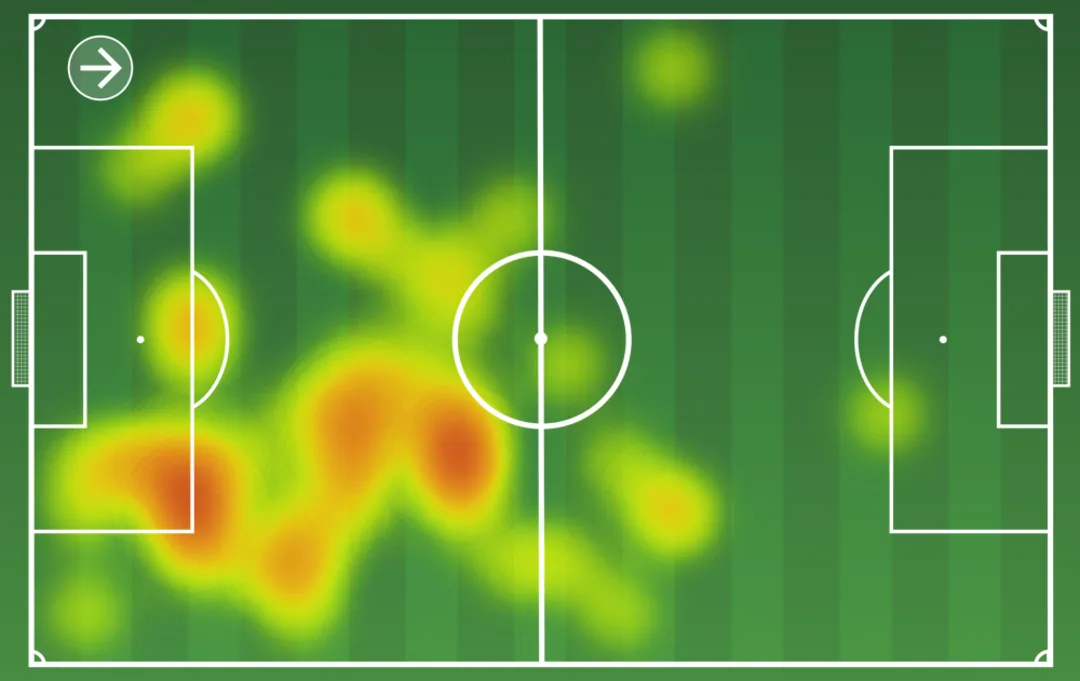

In [ ]:
sacar_mapa_calor('Andrés Llinás', data_partido)

In [ ]:
df_jugadores['stats'] = df_jugadores.stats.fillna(0)

In [ ]:
df_jugadores.stats.iloc[0]

[{'type': 30,
  'value': "90'",
  'isTop': True,
  'categoryId': 2,
  'name': 'Minutes',
  'shortName': 'Min',
  'order': 20101,
  'imageId': 229},
 {'type': 23,
  'value': '0',
  'isTop': True,
  'categoryId': 3,
  'name': 'Salvadas de Portero',
  'shortName': 'Salvadas',
  'order': 30103,
  'imageId': 222},
 {'type': 27,
  'value': '0',
  'categoryId': 2,
  'name': 'Goles',
  'order': 20301,
  'imageId': 226},
 {'type': 26,
  'value': '0',
  'categoryId': 2,
  'name': 'Asistencias',
  'order': 20701,
  'imageId': 225},
 {'type': 44,
  'value': '0/1',
  'isTop': True,
  'categoryId': 3,
  'name': 'Penales atajados',
  'order': 30102,
  'imageId': 233},
 {'type': 35,
  'value': '1',
  'categoryId': 3,
  'name': 'Goles recibidos',
  'order': 30101,
  'imageId': 235},
 {'type': 3,
  'value': '0',
  'categoryId': 2,
  'name': 'Total Remates',
  'order': 20204,
  'imageId': 3},
 {'type': 9,
  'value': '0',
  'categoryId': 2,
  'name': 'Fueras de Juego',
  'order': 20210,
  'imageId': 9},
 

In [ ]:
result_dict = {}
list_dict = []

for i in range(df_jugadores.shape[0]):
    data_list = df_jugadores.stats.iloc[i]
    # Iterar sobre la lista
    try:
        for item in data_list:
            new_dict = {'type': item['type'], 'name': item['name']}
            result_dict[len(result_dict) + 1] = new_dict
            list_dict.append(new_dict)
    except TypeError:
        continue

In [ ]:
unique_combinations = set()
result_list = []

for item in list_dict:
    combination = (item['type'], item['name'])
    if combination not in unique_combinations:
        result_list.append(item)
        unique_combinations.add(combination)
list_of_dicts = [{'type': type_value, 'name': name_value} for type_value, name_value in unique_combinations]


In [ ]:
pd.DataFrame(list_of_dicts).sort_values(by='type').reset_index(drop=True)

,type,name
0,3,Total Remates
1,4,Remates a Puerta
2,5,Remates Fuera
3,6,Remates bloqueados
4,9,Fueras de Juego
5,19,Pases completados
6,23,Salvadas de Portero
7,24,Grandes chances
8,26,Asistencias
9,27,Goles


In [ ]:
df_jugadores['stats'].iloc[0]

[{'type': 30,
  'value': "90'",
  'isTop': True,
  'categoryId': 2,
  'name': 'Minutes',
  'shortName': 'Min',
  'order': 20101,
  'imageId': 229},
 {'type': 23,
  'value': '0',
  'isTop': True,
  'categoryId': 3,
  'name': 'Salvadas de Portero',
  'shortName': 'Salvadas',
  'order': 30103,
  'imageId': 222},
 {'type': 27,
  'value': '0',
  'categoryId': 2,
  'name': 'Goles',
  'order': 20301,
  'imageId': 226},
 {'type': 26,
  'value': '0',
  'categoryId': 2,
  'name': 'Asistencias',
  'order': 20701,
  'imageId': 225},
 {'type': 44,
  'value': '0/1',
  'isTop': True,
  'categoryId': 3,
  'name': 'Penales atajados',
  'order': 30102,
  'imageId': 233},
 {'type': 35,
  'value': '1',
  'categoryId': 3,
  'name': 'Goles recibidos',
  'order': 30101,
  'imageId': 235},
 {'type': 3,
  'value': '0',
  'categoryId': 2,
  'name': 'Total Remates',
  'order': 20204,
  'imageId': 3},
 {'type': 9,
  'value': '0',
  'categoryId': 2,
  'name': 'Fueras de Juego',
  'order': 20210,
  'imageId': 9},
 

In [ ]:
dlv = df_jugadores[df_jugadores['name'] == 'David Silva']

In [ ]:
heatmap = Image.open(urlopen(dlv.heatMap.iloc[0]))

In [ ]:
fig, ax = plt.subplots(figsize=(16,9),constrained_layout=True)
fig.set_facecolor('white')

#ax1.text(.5,.5,'Acá va texto')
ax_image2 = add_image(
        heatmap, fig, left=0.113, bottom=0.67, width=0.055, height=0.055
    )

NameError: name 'plt' is not defined

In [ ]:
df_jugadores['stats'].apply(pd.Series).fillna(0).head(2)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,"{'type': 30, 'value': '90'', 'isTop': True, 'c...","{'type': 23, 'value': '3', 'isTop': True, 'cat...","{'type': 27, 'value': '0', 'categoryId': 2, 'n...","{'type': 26, 'value': '0', 'categoryId': 2, 'n...","{'type': 35, 'value': '0', 'isTop': True, 'cat...","{'type': 3, 'value': '0', 'categoryId': 2, 'na...","{'type': 9, 'value': '0', 'categoryId': 2, 'na...","{'type': 78, 'value': '0.00', 'categoryId': 2,...","{'type': 46, 'value': '0', 'categoryId': 2, 'n...","{'type': 19, 'value': '24/30 (80%)', 'category...",...,"{'type': 73, 'value': '0', 'categoryId': 3, 'n...","{'type': 60, 'value': '0', 'categoryId': 3, 'n...","{'type': 43, 'value': '1', 'categoryId': 3, 'n...","{'type': 57, 'value': '2', 'categoryId': 3, 'n...","{'type': 40, 'value': '1', 'categoryId': 3, 'n...","{'type': 41, 'value': '0', 'categoryId': 3, 'n...",0,0,0,0
1,"{'type': 30, 'value': '90'', 'isTop': True, 'c...","{'type': 27, 'value': '0', 'isTop': True, 'cat...","{'type': 26, 'value': '0', 'isTop': True, 'cat...","{'type': 3, 'value': '0', 'categoryId': 2, 'na...","{'type': 9, 'value': '0', 'categoryId': 2, 'na...","{'type': 78, 'value': '0.02', 'categoryId': 2,...","{'type': 46, 'value': '0', 'categoryId': 2, 'n...","{'type': 19, 'value': '41/49 (84%)', 'category...","{'type': 53, 'value': '4/7 (57%)', 'categoryId...","{'type': 45, 'value': '70', 'categoryId': 2, '...",...,"{'type': 40, 'value': '2', 'categoryId': 3, 'n...","{'type': 41, 'value': '1', 'categoryId': 3, 'n...","{'type': 39, 'value': '1/2 (50%)', 'categoryId...",0,0,0,0,0,0,0


In [ ]:
df_jugadores.apply(pd.Series).iloc[0][0]

{'type': 30,
 'value': "90'",
 'isTop': True,
 'categoryId': 2,
 'name': 'Minutes',
 'shortName': 'Min',
 'order': 20101,
 'imageId': 229}

In [ ]:
unique_types = set()

# Itera sobre las celdas y verifica si son objetos válidos
for cell in df_jugadores['stats'].apply(pd.Series).iloc[1].fillna(0):
    if not pd.isna(cell) and isinstance(cell, dict) and 'type' in cell:
        unique_types.add(cell['type'])

In [ ]:
unique_types

{3, 9, 19, 26, 27, 30, 37, 39, 40, 41, 42, 45, 46, 53, 60, 73, 78}